<a href="https://colab.research.google.com/github/arkaghosh98/Decision-Tree-ML-Project/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import log2

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [165]:
cols = ['mcv', 'alkphos', 'sgpt', 'sgot', 'gammagt', 'drinks']
skip = [85, 317, 149, 175] # duplicate rows
useful_cols = 6 # number of useful columns

df = pd.read_csv('bupa.data', names=cols, skiprows=skip, usecols=[i for i in range(useful_cols)])

In [48]:
df

,mcv,alkphos,sgpt,sgot,gammagt,drinks
0,85,92,45,27,31,0.0
1,85,64,59,32,23,0.0
2,86,54,33,16,54,0.0
3,91,78,34,24,36,0.0
4,87,70,12,28,10,0.0
...,...,...,...,...,...,...
336,99,75,26,24,41,12.0
337,96,69,53,43,203,12.0
338,98,77,55,35,89,15.0
339,91,68,27,26,14,16.0


In [49]:
df.describe()

,mcv,alkphos,sgpt,sgot,gammagt,drinks
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,90.120235,69.891496,30.513196,24.662757,38.401760,3.431085
std,4.452385,18.431988,19.586249,10.115541,39.439379,3.341640
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000
25%,87.000000,57.000000,19.000000,19.000000,15.000000,0.500000
50%,90.000000,67.000000,26.000000,23.000000,25.000000,3.000000
75%,92.000000,80.000000,34.000000,27.000000,46.000000,5.000000
max,103.000000,138.000000,155.000000,82.000000,297.000000,20.000000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mcv      341 non-null    int64  
 1   alkphos  341 non-null    int64  
 2   sgpt     341 non-null    int64  
 3   sgot     341 non-null    int64  
 4   gammagt  341 non-null    int64  
 5   drinks   341 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 16.1 KB


In [166]:
mean = df[df.columns[5]].mean()
df.loc[(df.drinks < mean), 'drinks']=int(0)
df.loc[(df.drinks >= mean), 'drinks']=int(1)
df = df.astype(int)
df

,mcv,alkphos,sgpt,sgot,gammagt,drinks
0,85,92,45,27,31,0
1,85,64,59,32,23,0
2,86,54,33,16,54,0
3,91,78,34,24,36,0
4,87,70,12,28,10,0
...,...,...,...,...,...,...
336,99,75,26,24,41,1
337,96,69,53,43,203,1
338,98,77,55,35,89,1
339,91,68,27,26,14,1


In [52]:
df.drinks.unique()

array([0, 1])

In [167]:
print(len(df[df['drinks'] == 0]))
print(len(df[df['drinks'] == 1]))

189
152


In [56]:
colour = {0 : 'red',  1: 'green'}
colour.items()

dict_items([(0, 'red'), (1, 'green')])

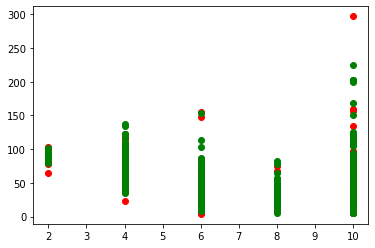

In [57]:
for i in range(5):
    col = df.columns[i]
    target = df.columns[5]

    d = {}

    for j in range(len(df)):
        if df[target][j] not in d:
            d[df[target][j]] = []
        d[df[target][j]].append(df[col][j])

    for e in d.keys():
        y = d[e]
        X = [(i+1)*2 for _ in range(len(y))]
        col = colour[e]
        plt.scatter(X, y, color=col)
      
plt.show()

In [59]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [168]:
class TreeNode():
  def __init__(self, is_leaf, attribute=None, split_value=None, left=None, right=None, target_class=None):
    # to differentiate between internal and leaf node
    self.is_leaf = is_leaf

    # atrributes for internal/decision node
    self.attribute = attribute
    self.split_value = split_value
    self.left = left
    self.right = right
    
    # attribute for stroring class in leaf node
    self.target_class = target_class

In [169]:
class DecisionTree():
  def __init__(self):
    self.root = None
    
  def build_tree(self, data):
    if len(data) == 1:
      return TreeNode(is_leaf=True, target_class=data.iloc[0][-1])
    
    m = data.shape[1]
      
    best_gain = float('-inf')
    best_attribute = None
      
    for i in range(m-1):
      col = data.columns[i]
      target = data.columns[5]
        
      gain = self.information_gain(data, col)
      if gain > best_gain:
        best_gain = gain
        best_attribute = col
          
    if best_gain == 0:
      n = len(data[data[target] == 0])
      m = len(data[data[target] == 1])
      if n > m:
        majority_class = 0
      else:
        majority_class = 1
      if n != 0 and m != 0:
        print("---> ", n, m)
      return TreeNode(is_leaf=True, target_class=majority_class)
      
    split_value = data[best_attribute].median()
    left_data = data[data[best_attribute] < split_value]
    right_data = data[data[best_attribute] >= split_value]
      
    left = self.build_tree(left_data)
    right = self.build_tree(right_data)
      
    return TreeNode(is_leaf=False, attribute=best_attribute, split_value=split_value, left=left, right=right)
    
  def entropy(self, data):
    res = 0
    
    classes = data.drinks.unique()
    for c in classes:
      count = len(data[data['drinks'] == c])
      if count != 0:
        res -= (count/len(data))*log2(count/len(data))
      
    return res
  
  def information_gain(self, data, col):
    gain = self.entropy(data)
    
    split_value = data[col].median()
    left_data = data[data[col] < split_value]
    right_data = data[data[col] >= split_value]
    
    gain -= (len(left_data)/len(data))*self.entropy(left_data)
    gain -= (len(right_data)/len(data))*self.entropy(right_data)
    
    return gain
  
  def fit(self, X, y):
    data = pd.concat([X, y], axis=1)
    self.root = self.build_tree(data)
  
  def get_class(self, root, X):
    if root.is_leaf:
      return root.target_class

    if X[root.attribute] < root.split_value:
      return self.get_class(root.left, X)
    return self.get_class(root.right, X)
    
  def predict(self, X):
    return self.get_class(self.root, X)

In [170]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [171]:
X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]

In [172]:
X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

In [173]:
model = DecisionTree()
model.fit(X_train, y_train)

In [174]:
correct = 0

for i in range(len(X_train)):
  prediction = model.predict(X_train.iloc[i])
  if prediction == y_train.iloc[i]:
    correct += 1

print("Accuracy:", (correct/len(X_train))*100)

Accuracy: 100.0


In [175]:
correct = 0

for i in range(len(X_test)):
  prediction = model.predict(X_test.iloc[i])
  if prediction == y_test.iloc[i]:
    correct += 1

print("Accuracy:", (correct/len(X_test))*100)

Accuracy: 62.31884057971014
